План
1. Очистка данных
2. Исследование данных
3. Разработка концепций
4. Итог

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [90]:
df = pd.read_csv(r"C:\Users\mns94\PycharmProjects\tpu-8e21-ai-basis\Moiseev\data\raw\life_expectancy_data.csv")

In [91]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Секция 1: Очистка данных

### 1.1: Подготовка

In [92]:
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

Описание входных параметров
1. Country: страна
2. Year: год
3. Status: Статус развитого или развивающегося
4. Life expectancy: Ожидаемая продолжительность жизни в возрасте
5. Adult Mortality: Коэффициенты смертности среди взрослых обоих полов (вероятность смерти в возрасте от 15 до 60 лет на 1000 человек населения)
6. infant deaths: Количество младенческих смертей на 1000 человек населения
7. Alcohol: Алкоголь, зарегистрированное потребление на душу населения (15+) (в литрах чистого алкоголя)
8. percentage expenditure: Расходы на здравоохранение как процент от валового внутреннего продукта на душу населения (%)
9. Hepatitis B: Охват иммунизацией против гепатита B (HepB) среди детей в возрасте 1 года (%)
10. Measles: Корь - количество зарегистрированных случаев на 1000 человек населения
11. BMI: Средний индекс массы тела всего населения
12. under-five deaths: Количество смертей детей в возрасте до пяти лет на 1000 человек населения
13. Polio: Охват иммунизацией против полиомиелита (Pol3) среди детей в возрасте 1 года (%)
14. Total expenditure: Общие государственные расходы на здравоохранение как процент от общих государственных расходов (%)
15. Diphtheria: Охват иммунизацией против дифтерии, столбняка и коклюша (DTP3) среди детей в возрасте 1 года (%)
16. HIV/AIDS: Смертность на 1 000 живорождений ВИЧ/СПИД (0-4 года)
17. GDP: Валовой внутренний продукт на душу населения (в долларах США)
18. Population: Население страны
19. thinness 1-19 years: Распространенность худобы среди детей и подростков в возрасте от 10 до 19 лет (% )
20. thinness 5-9 years: Распространенность худобы среди детей в возрасте от 5 до 9 лет (%)
21. Income composition of resources: Индекс человеческого развития с точки зрения структуры доходов ресурсов (индекс варьируется от 0 до 1)
22. Schooling: Количество лет обучения в школе (лет)

Изменим название переменной thinness_1-19_years на thinness_10-19_years, поскольку это более точно отражает значение переменной.

In [93]:
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

### 1.2: NAN-значения

In [94]:
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2724.000000,2724.000000,2732.000000,2547.000000,2732.000000,2207.000000,2732.000000,2699.000000,2732.000000,2714.000000,2517.000000,2714.000000,2732.000000,2317.000000,2.128000e+03,2699.000000,2699.000000,2577.000000,2581.000000
mean,69.120228,165.923642,30.588946,4.555748,727.049563,80.860897,2430.580527,38.069767,42.385066,82.409359,5.946007,82.273397,1.722328,7316.813082,1.245470e+07,4.903927,4.935495,0.624236,11.951724
std,9.511317,123.837567,118.158278,4.034548,1974.303746,25.130776,11240.642911,20.062308,160.480411,23.421806,2.506294,23.628897,4.962085,14020.856082,5.761456e+07,4.448684,4.540056,0.211894,3.376084
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,75.000000,0.000000,0.850000,4.595646,77.000000,0.000000,19.100000,0.000000,77.000000,4.280000,78.000000,0.100000,464.184650,1.917392e+05,1.600000,1.600000,0.489000,10.100000
50%,72.000000,145.000000,3.000000,3.650000,64.395284,92.000000,17.000000,42.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1741.142552,1.383743e+06,3.400000,3.400000,0.675000,12.300000
75%,75.600000,228.250000,23.000000,7.600000,437.086674,97.000000,370.500000,56.100000,30.000000,97.000000,7.500000,97.000000,0.800000,5828.745662,7.475598e+06,7.200000,7.300000,0.776000,14.200000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Обратим внимание на:
- Смертность взрослого населения равна 1? Скорее всего, это ошибка в измерении, но какие значения здесь имеют смысл? Возможно, потребуется изменить значение на нулевое, если оно ниже определенного порога.
- Младенческая смертность составляет 0 на 1000 человек? Это просто неправдоподобно. Также, с другой стороны, 1800 - это, скорее всего, выброс, но это возможно в стране с очень высоким уровнем рождаемости и, возможно, не очень высокой общей численностью населения.
- BMI 1 и 87,3? Уверен, что в этом случае не существовало бы всего населения. BMI 15 и ниже свидетельствует о серьезном недостатке веса, а BMT 40 и выше - о патологическом ожирении, поэтому большое количество этих измерений просто кажется нереалистичным, возможно, эту переменную вообще не стоит рассматривать.
- Смертность в возрасте до пяти лет, аналогичная младенческой, просто маловероятна и имеет нулевые значения.
- Возможен ли показатель ВВП на душу населения на уровне 1,68 (долларов США)? Сомнительно, но, возможно, такие низкие значения являются выбросами.
- Население всей страны составляет 34 человека? Хм...

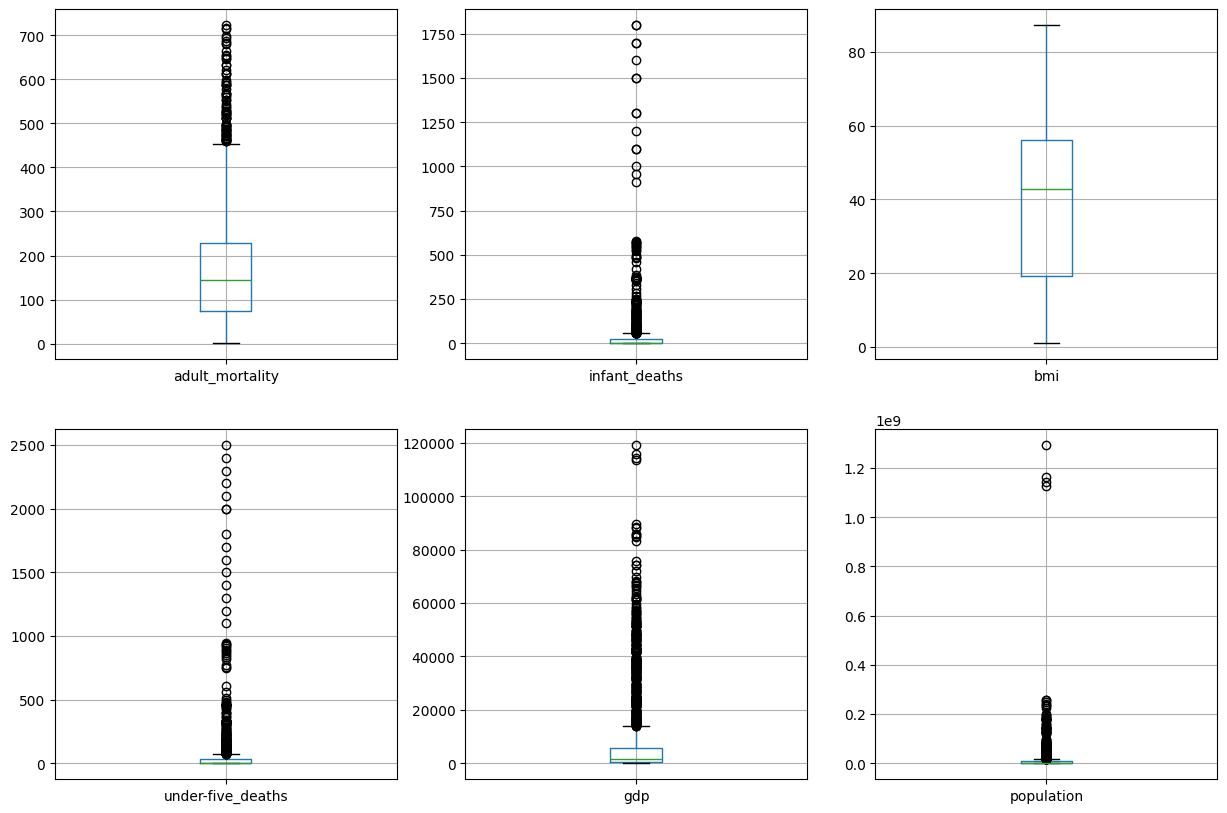

In [95]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

Некоторые из вышеперечисленных переменных могут быть просто выбросами - выходами за границу, но есть и такие, которые почти наверняка являются ошибками того или иного рода. Для следующих из перечисленных переменных значение будет изменено, поскольку эти цифры не имеют никакого смысла:
1. Показатели смертности взрослого населения ниже 5%
2. Младенческая смертность равна 0
3. BMI менее 10 и более 50
4. Смертность в возрасте до пяти лет равна 0

In [96]:
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2732 non-null   object 
 1   year                             2732 non-null   int64  
 2   status                           2732 non-null   object 
 3   life_expectancy                  2724 non-null   float64
 4   adult_mortality                  2594 non-null   float64
 5   infant_deaths                    1956 non-null   float64
 6   alcohol                          2547 non-null   float64
 7   percentage_expenditure           2732 non-null   float64
 8   hepatitis_b                      2207 non-null   float64
 9   measles                          2732 non-null   int64  
 10  bmi                              1391 non-null   float64
 11  under-five_deaths                2014 non-null   float64
 12  polio               

Нулевые значения есть, причем в bmi их почти 50% - откинем этот параметр.

In [98]:
df.drop(columns='bmi', inplace=True)

Есть много столбцов, содержащих нулевые значения, поскольку это данные, отсортированные по странам, лучшим способом было бы интерполировать данные по странам. Однако при попытке интерполяции по странам не вводятся никакие значения, поскольку данные по странам для всех нулевых значений являются нулевыми для каждого года, поэтому наилучшим возможным методом здесь может быть вычисление по годам. Ниже приведено среднее значение за каждый год.

In [99]:
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

### 1.3: Выход за границы разумного

Сначала для каждой переменной создадим блок-график и гистограмму, чтобы визуально увидеть, существуют ли выходы за границу.

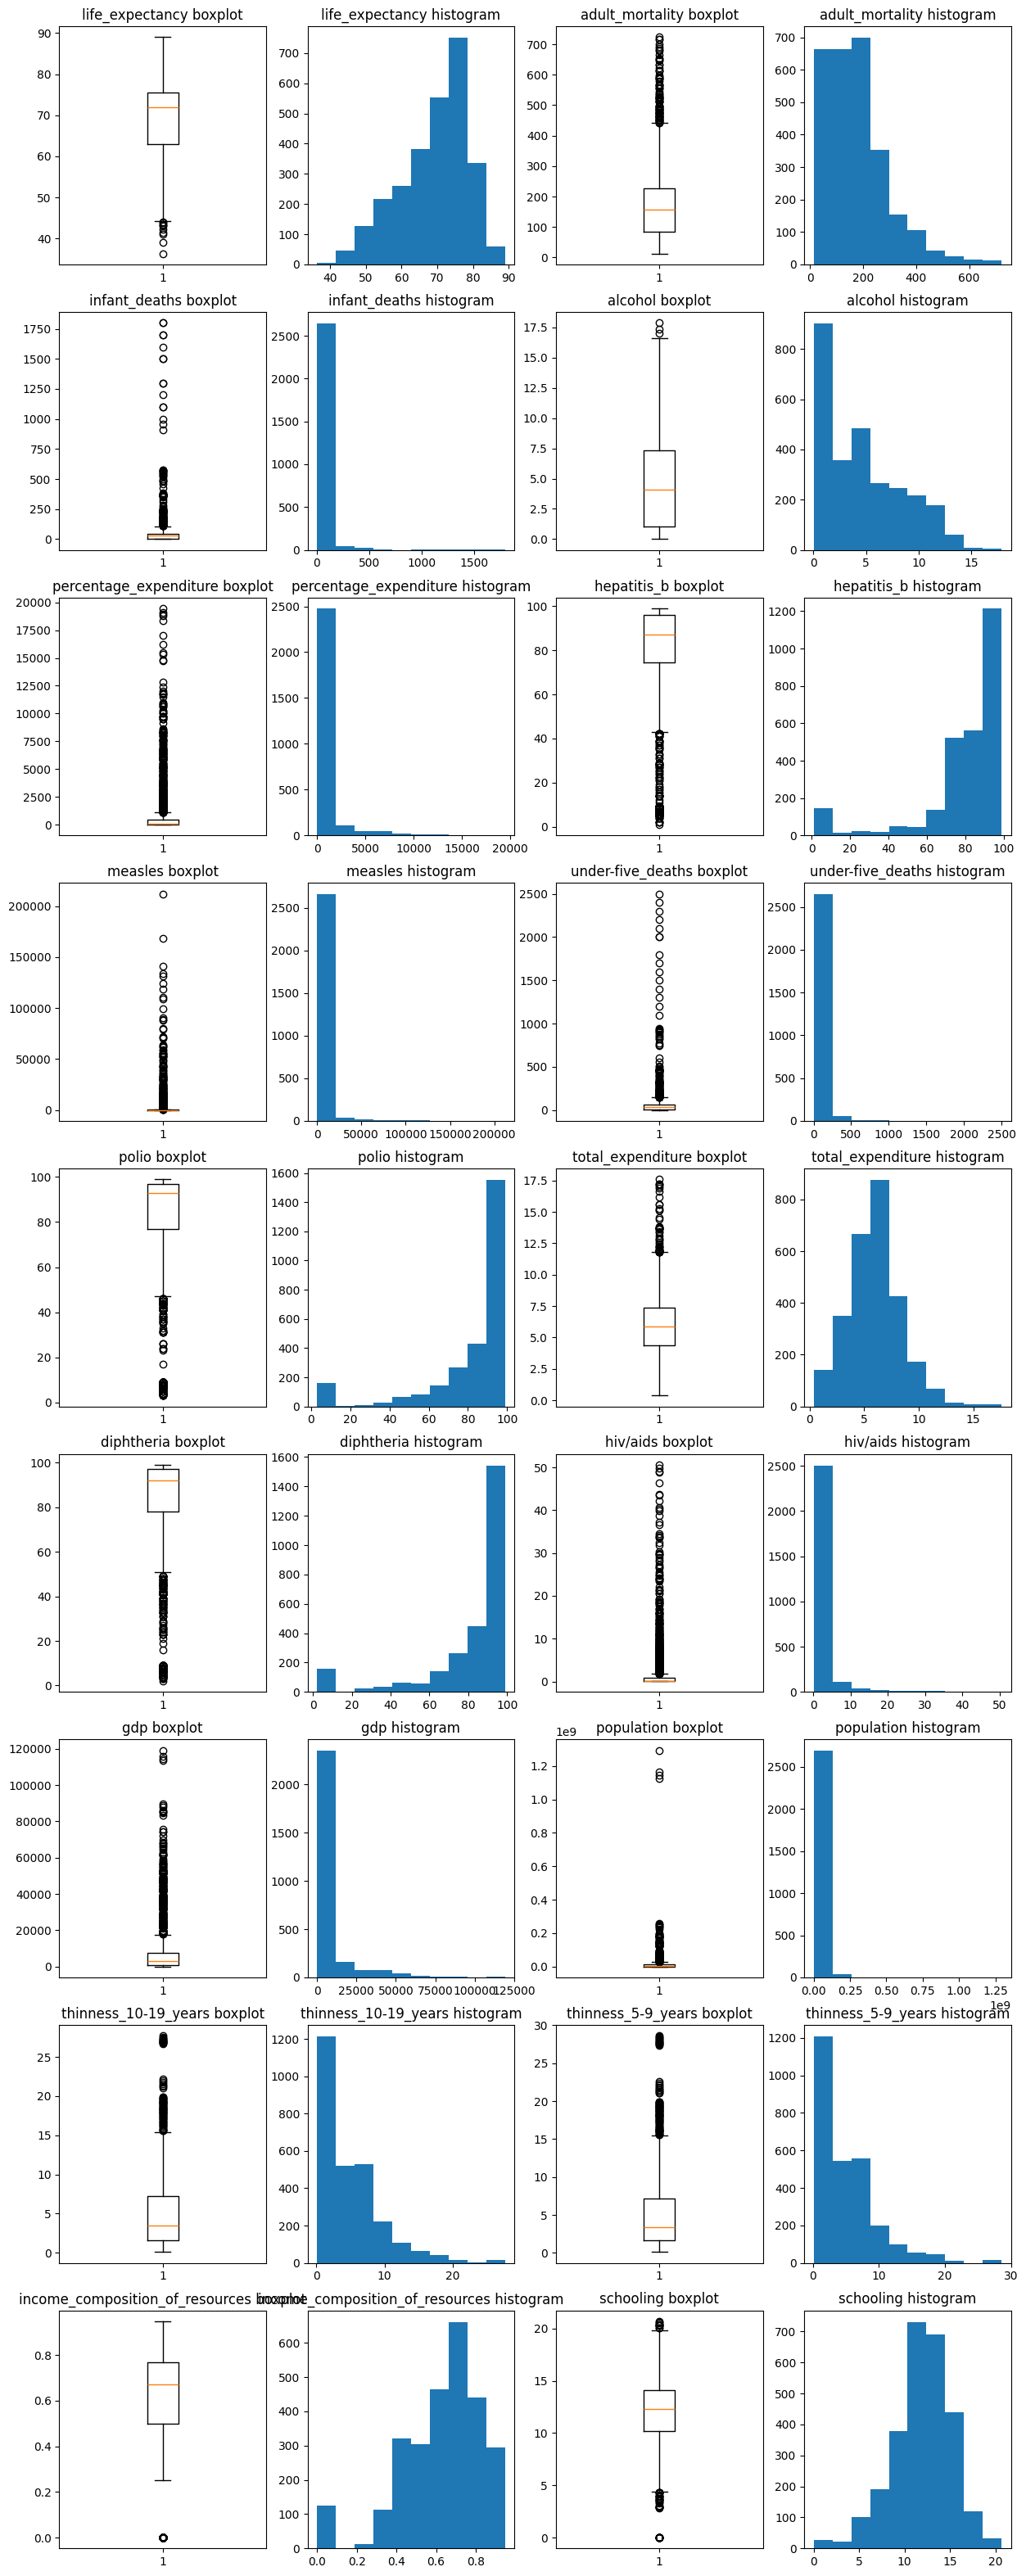

In [100]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

Визуально легко заметить, что для всех этих переменных существует ряд отклонений, включая целевую переменную - ожидаемую продолжительность жизни.

#### 1.3.1: А делать то, что?

Существует несколько способов борьбы с выбросами в наборе данных:
1. Исключить выбросы
2. Ограничить значения верхними и/или нижними границами
3. Преобразовать данные

Поскольку каждая переменная имеет уникальное количество выбросов, а также имеет выбросы на разных сторонах данных, лучшим решением, вероятно, является систематизация значений для каждой переменной в отдельности до тех пор, пока не останется никаких выбросов. Приведенная ниже функция позволяет делать именно это, переходя от переменной к переменной с возможностью использовать нижний предел и верхний предел для winsorization. По умолчанию функция будет отображать две параллельные диаграммы для переменной (одна диаграмма с исходными данными и одна с измененными параметрами winsorized). Как только будет найден удовлетворительный предел (с помощью визуального анализа), данные с параметрами winsorized будут сохранены в словаре wins_dict, чтобы к ним можно было легко получить доступ позже.

In [101]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

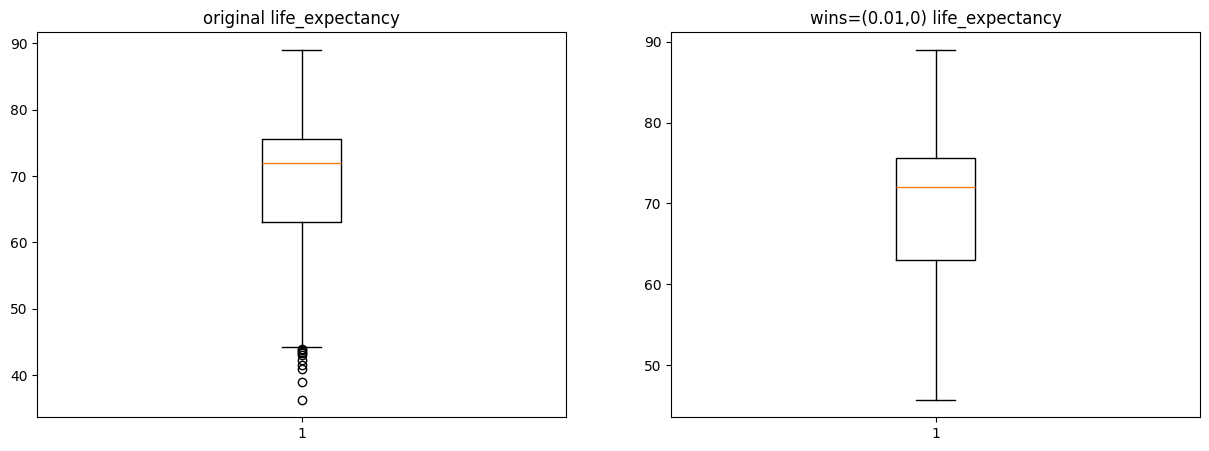

In [102]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

Приведенный выше график является примером того, как выполняется визуальная проверка winsorization (остальные не показаны для краткости).

Переменные были максимально оптимизированы, чтобы сохранить как можно больше данных в первозданном виде и при этом исключить выходы за границы. Убедимся в этом:

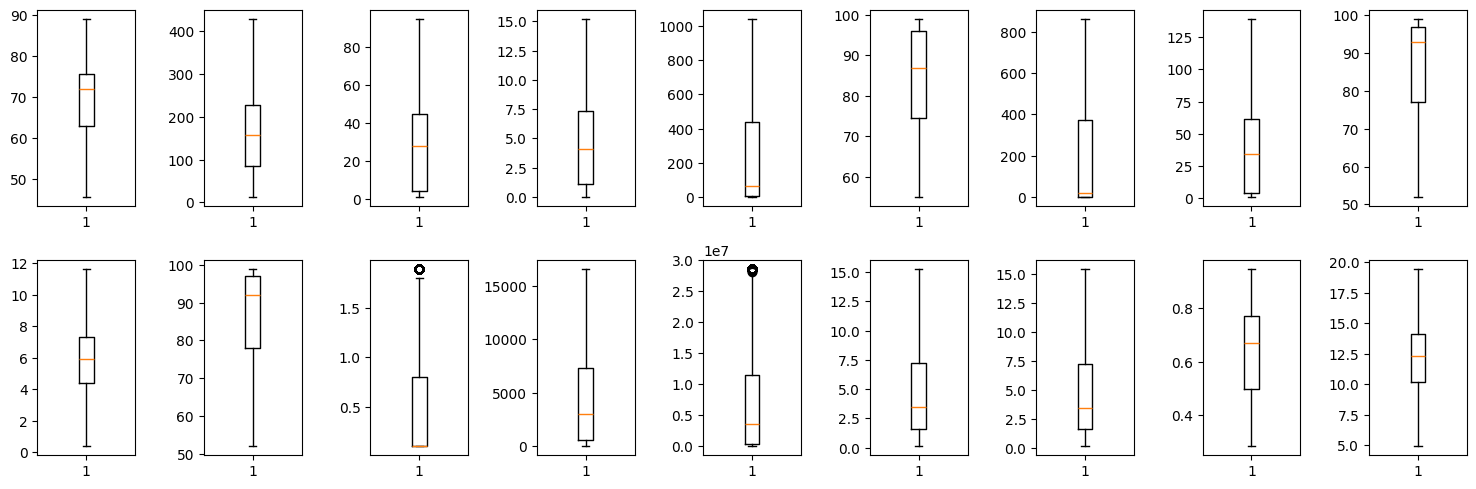

In [103]:
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

Теперь, когда с выходами за границу покончено, раздел "Очистка данных" завершен.

# Раздел 2: Исследование данных

Прежде чем приступить к исследованию, следует создать новый фрейм данных с упорядоченными данными.

In [104]:
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

### 2.1: Одномерный анализ

Одномерный анализ - это анализ данных для каждой переменной отдельно. Как правило, это лучше всего достигается с помощью гистограмм для непрерывных данных, графиков подсчета / столбчатых диаграмм для категориальных данных и, конечно, путем получения описательной статистики с помощью `.describe()`.

In [105]:
wins_df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2.732000e+03,2732.000000,2732.000000,2732.000000,2732.000000
mean,2007.501098,69.144714,170.169287,28.737806,4.597186,274.440174,83.575346,227.695095,38.882799,85.369285,5.980831,85.381101,0.552050,4936.713899,7.446923e+06,4.763312,4.780937,0.637384,12.013626
std,4.626314,9.448237,107.738161,25.837844,3.889359,371.953085,13.871713,339.996735,38.059508,15.320865,2.307504,15.234342,0.713786,5313.157187,8.608105e+06,3.944700,3.984958,0.172762,3.092137
min,2000.000000,45.700000,13.000000,1.000000,0.010000,0.000000,55.000000,0.000000,1.000000,52.000000,0.370000,52.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.284000,4.900000
25%,2003.000000,63.000000,85.000000,4.000000,1.077500,4.595646,74.430380,0.000000,4.000000,77.000000,4.380000,78.000000,0.100000,575.320480,4.140630e+05,1.600000,1.600000,0.499000,10.200000
50%,2007.000000,72.000000,157.981818,28.000000,4.090000,64.395284,87.000000,17.000000,34.000000,93.000000,5.900000,92.000000,0.100000,2976.124039,3.642542e+06,3.450000,3.400000,0.670000,12.300000
75%,2012.000000,75.600000,228.000000,44.928000,7.322500,437.086674,96.000000,370.500000,61.390625,97.000000,7.340000,97.000000,0.800000,7330.537209,1.146815e+07,7.200000,7.200000,0.769250,14.100000
max,2015.000000,89.000000,428.000000,95.000000,15.190000,1040.629462,99.000000,860.000000,139.000000,99.000000,11.670000,99.000000,1.900000,16586.452000,2.863513e+07,15.300000,15.500000,0.948000,19.500000


In [106]:
wins_df.describe(include='O')

,country,status
count,2732,2732
unique,191,2
top,Maldives,Developing
freq,16,2271


**Визуальное распределение**

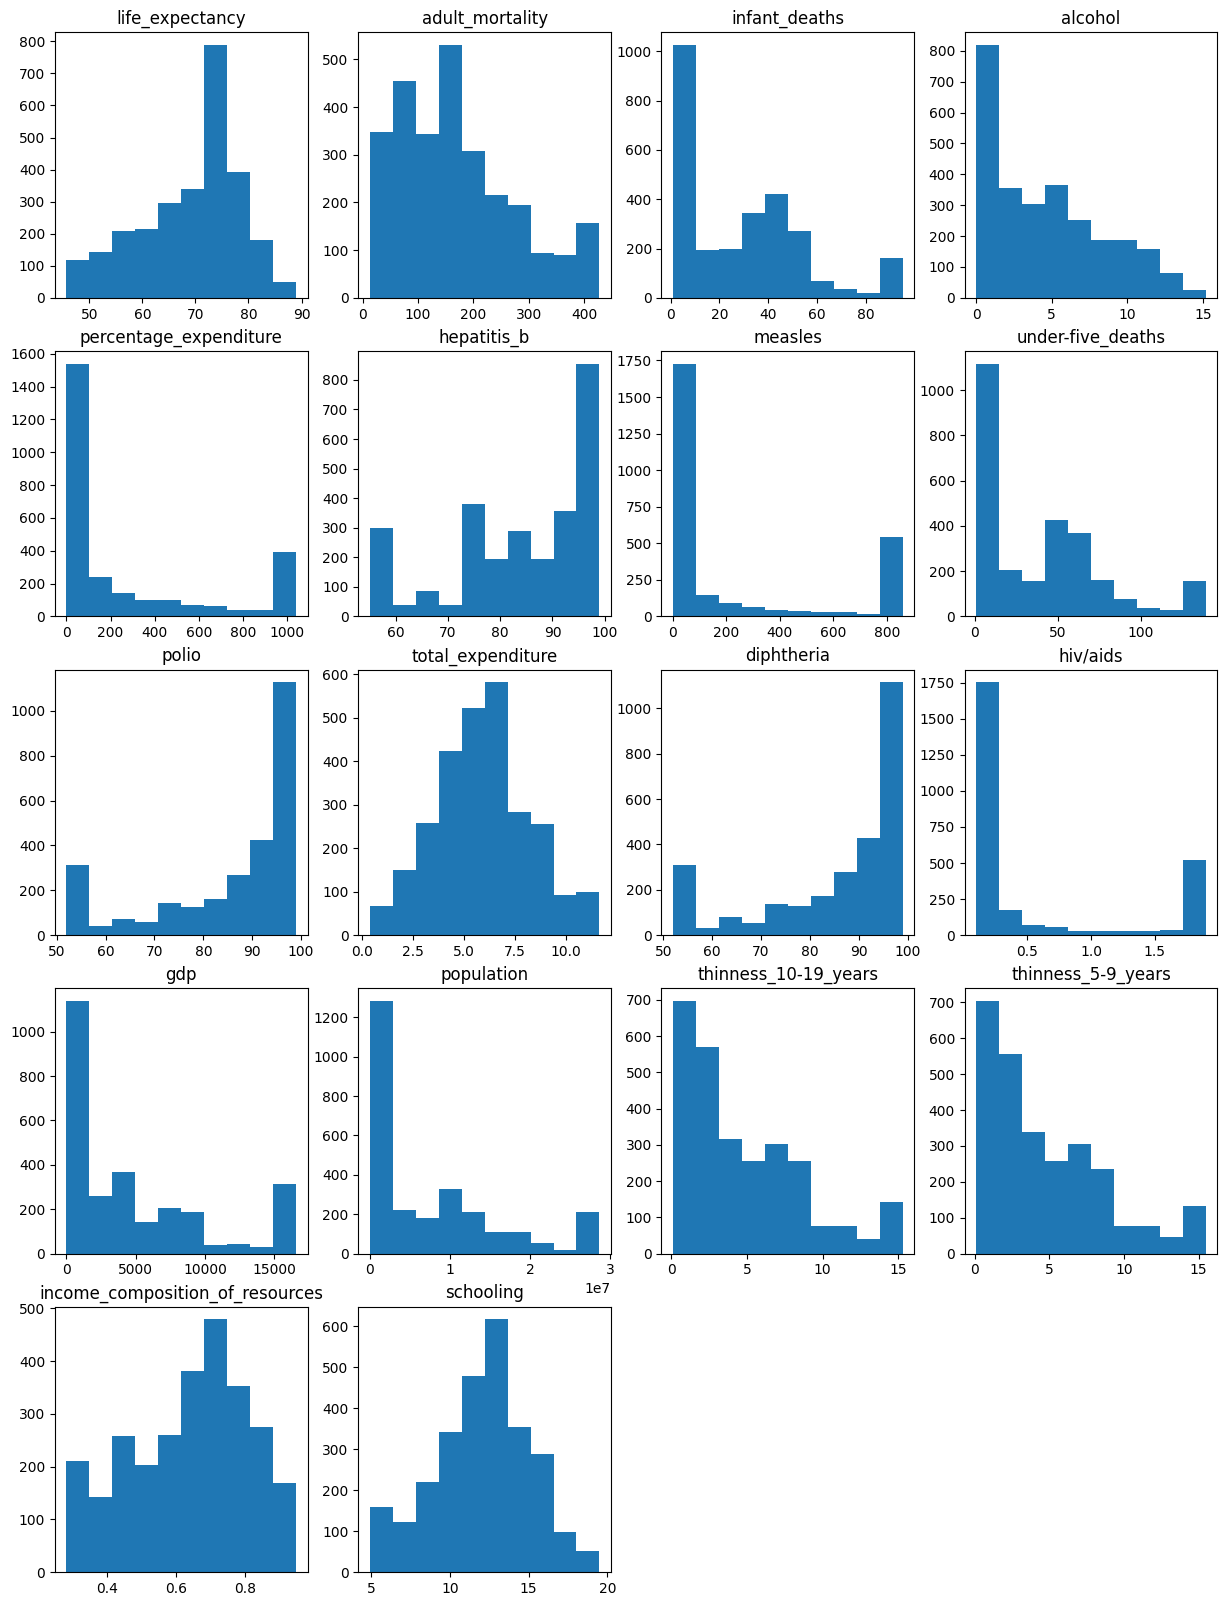

In [107]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

Систематизация оказала значительное влияние на некоторые переменные, в то время как на другие он не оказал существенного влияния. Несмотря на то, что все эти переменные были систематизированы тем или иным образом, некоторые переменные прогназируются гораздо более очевидны, чем другие. 

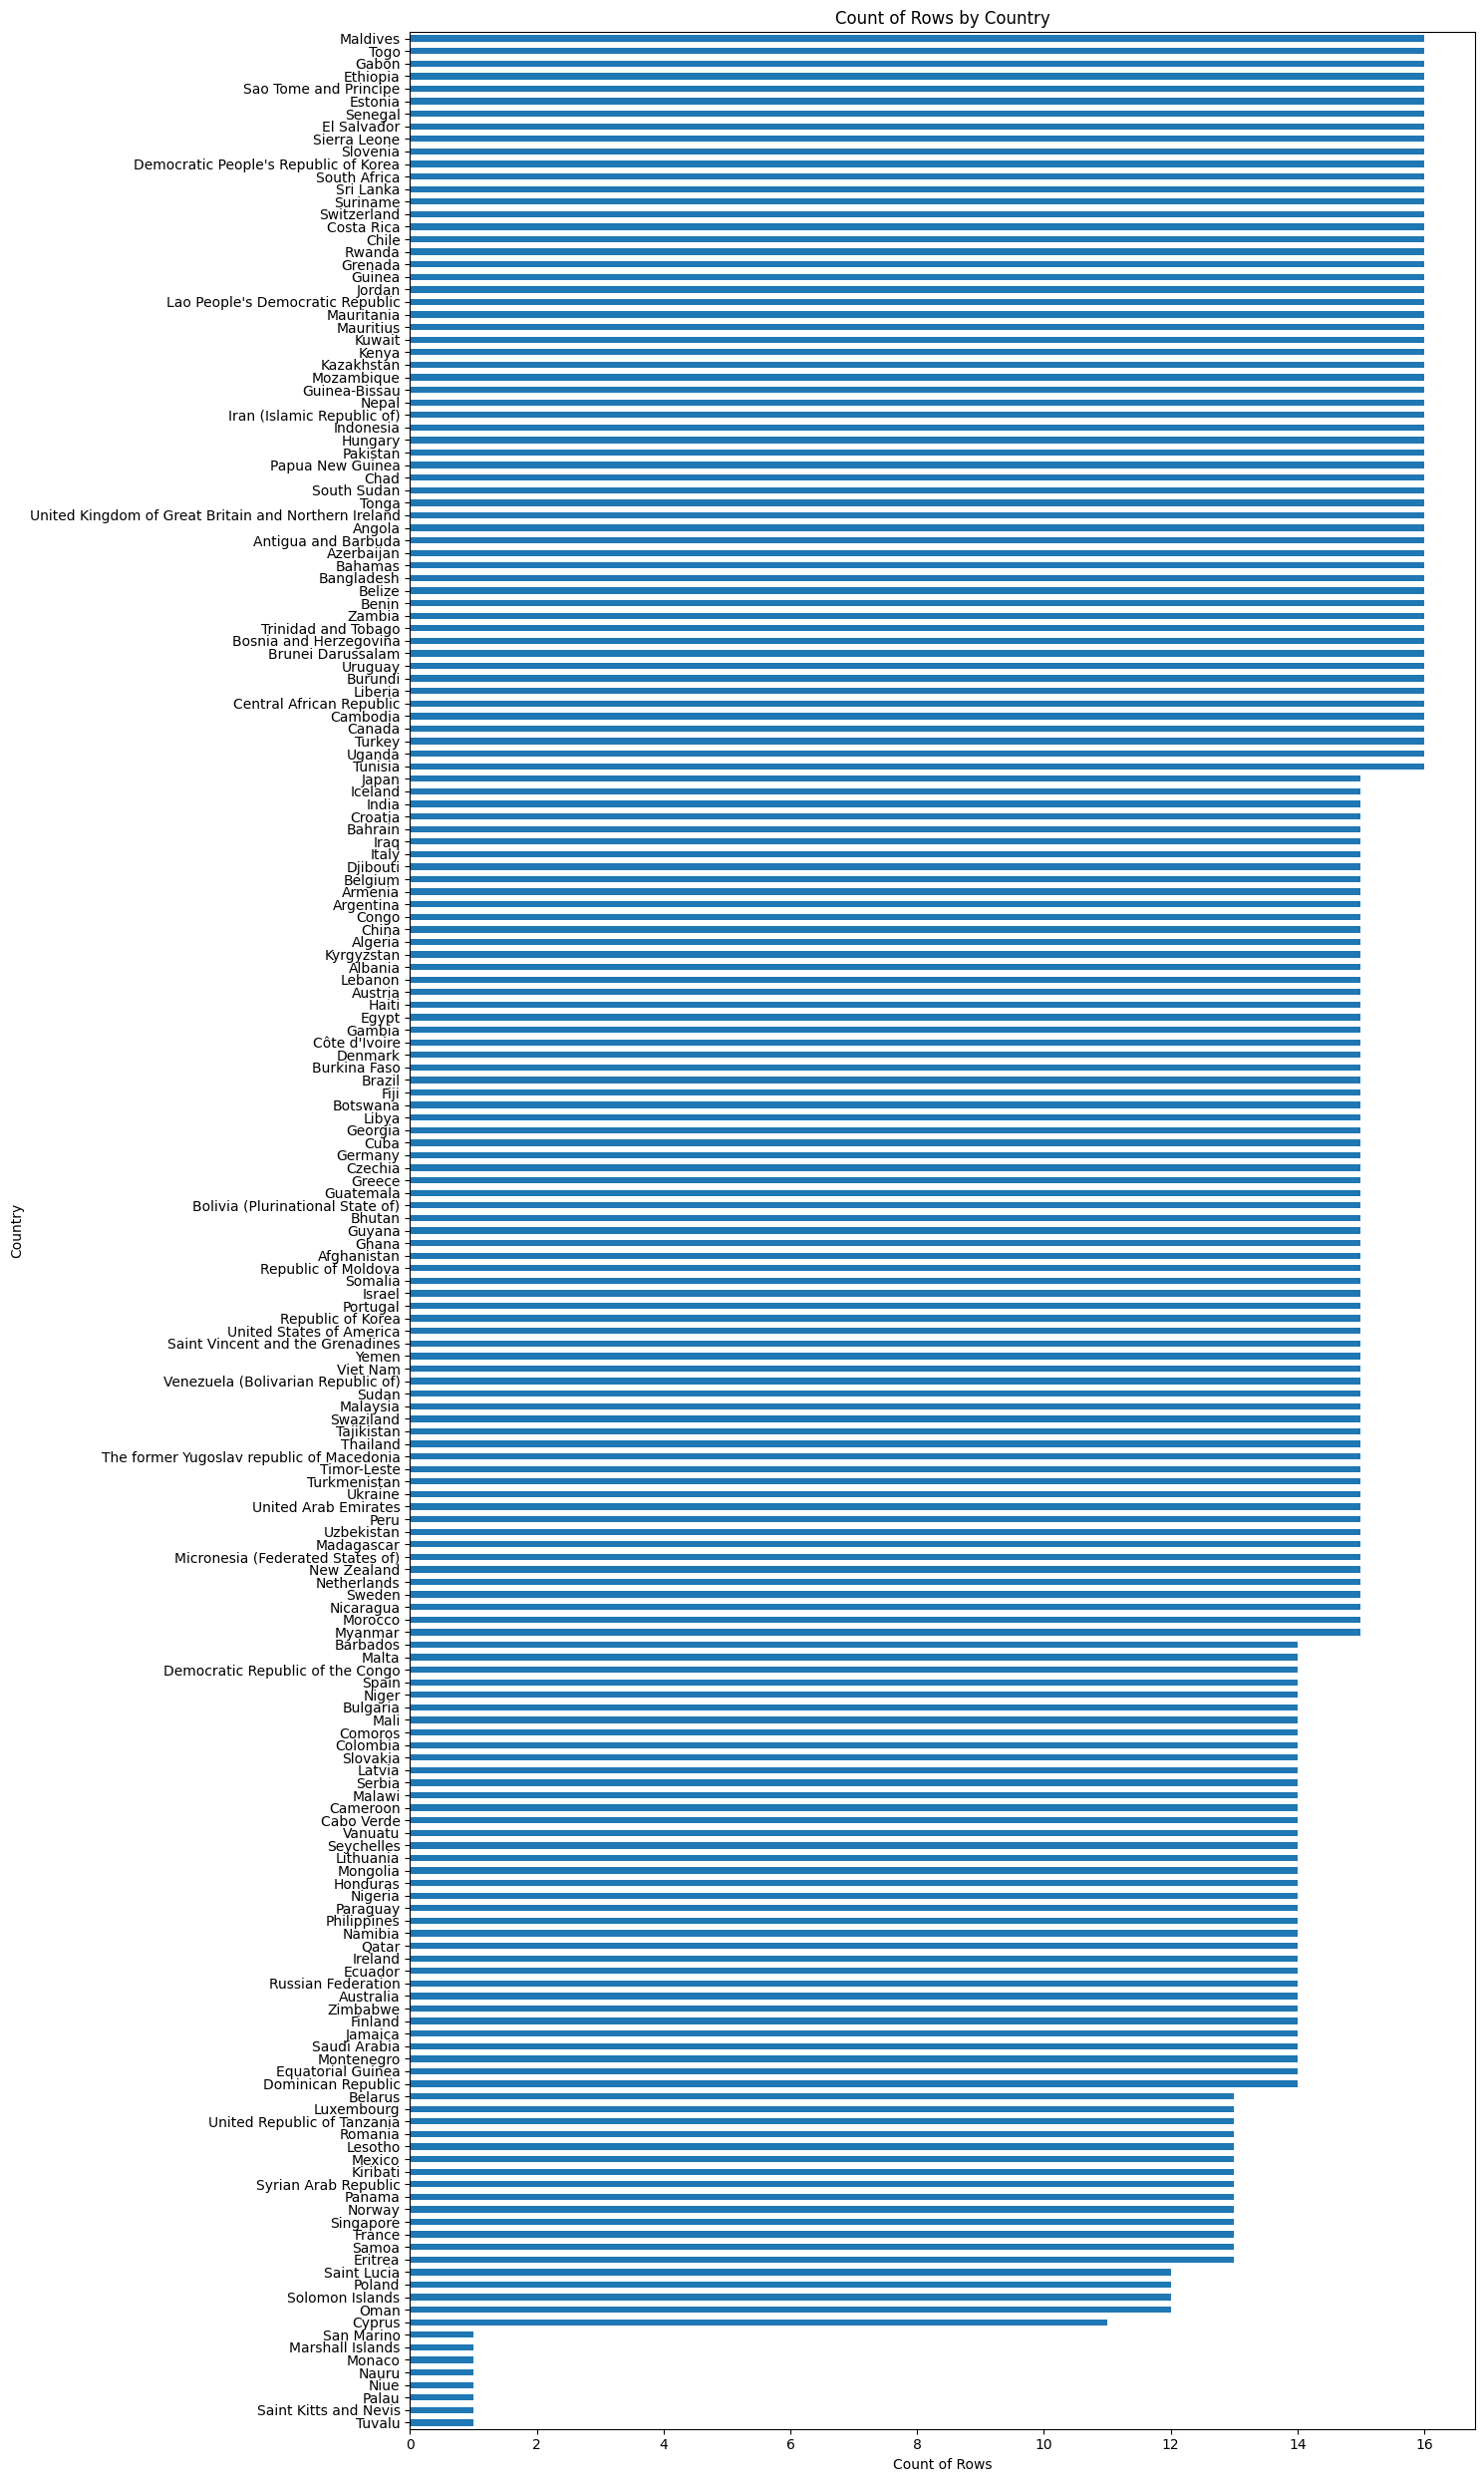

In [108]:
plt.figure(figsize=(15, 25))
wins_df.country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Это не самый информативный график, но он показывает, что данные по большинству стран представлены неравномерно - от 1 года до 16 лет.

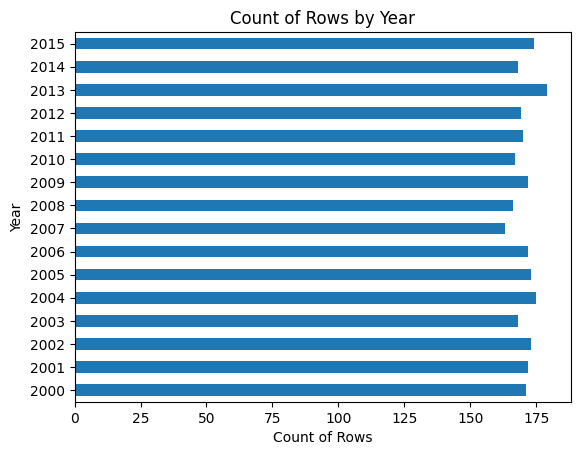

In [109]:
wins_df.year.value_counts().sort_index().plot(kind='barh')
plt.title('Count of Rows by Year')
plt.xlabel('Count of Rows')
plt.ylabel('Year')
plt.show()

Опять же, это не самый полезный график, но он показывает, что каждый год содержит одинаковое количество строк, за исключением 2013 года, который содержит на 10 строк больше, чем остальные. Это не должно отрицательно сказаться на анализе.

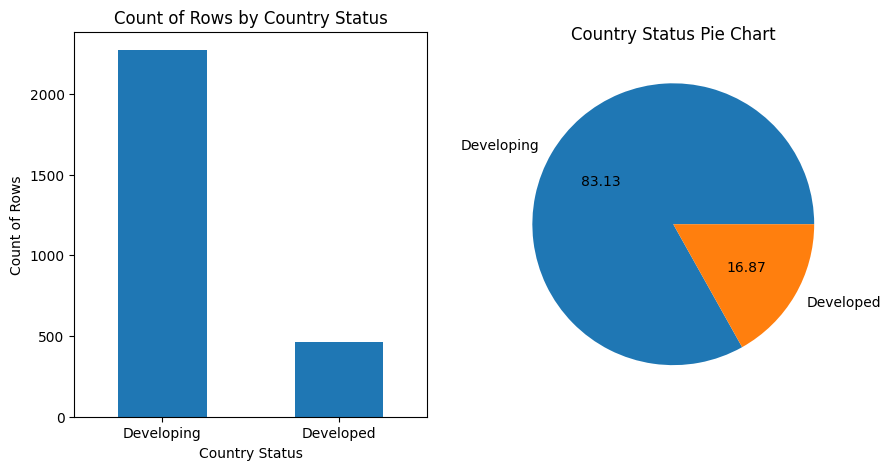

In [110]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
wins_df.status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
wins_df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

Этот график, несмотря на свою простоту, важен. Из приведенного выше примера видно, что большая часть наших данных поступает из стран, перечисленных как "развивающиеся" - 82,57%, если быть точным. Вполне вероятно, что любая используемая модель будет более точно отражать результаты для "развивающихся" стран по сравнению с "развитыми", поскольку большая часть данных относится к странам, которые являются "развивающимися", а не "развитыми".

### 2.2: Двумерный анализ

Здесь следует рассмотреть ряд моментов:
1. Сравнение непрерывных переменных с ожидаемой продолжительностью жизни (целевая переменная) и друг с другом
2. Сравнение категориальных переменных с ожидаемой продолжительностью жизни (целевая переменная)
3. Сравнение статуса страны и года с непрерывными переменными (страна имеет чрезвычайно большое количество значений при небольших размерах выборки, поэтому сравнение стран не особенно полезно для этого набора данных).

#### 2.2.1: Непрерывный анализ

In [111]:
wins_df[cont_vars].corr()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.000000,-0.678462,-0.221336,0.391751,0.486668,0.314657,-0.332742,-0.297925,0.576493,0.224820,0.583877,-0.797670,0.500512,0.008446,-0.509862,-0.508877,0.788678,0.744006
adult_mortality,-0.678462,1.000000,0.118041,-0.187277,-0.294046,-0.214631,0.216657,0.168641,-0.348372,-0.120967,-0.351507,0.598245,-0.296987,0.007214,0.332396,0.340145,-0.508840,-0.452324
infant_deaths,-0.221336,0.118041,1.000000,-0.062034,-0.100861,-0.195621,0.326167,0.966833,-0.217036,-0.090811,-0.228253,0.122855,-0.066582,0.180855,0.201102,0.207731,-0.179257,-0.194254
alcohol,0.391751,-0.187277,-0.062034,1.000000,0.374825,0.102229,-0.199741,-0.104373,0.264178,0.308414,0.270646,-0.188612,0.390861,-0.036485,-0.437243,-0.426751,0.466934,0.514667
percentage_expenditure,0.486668,-0.294046,-0.100861,0.374825,1.000000,0.119012,-0.197263,-0.139235,0.266245,0.157787,0.265190,-0.292695,0.710415,-0.079366,-0.332839,-0.334653,0.553609,0.530355
hepatitis_b,0.314657,-0.214631,-0.195621,0.102229,0.119012,1.000000,-0.269285,-0.238160,0.603443,0.069150,0.642770,-0.283770,0.163896,-0.002728,-0.131467,-0.139844,0.293259,0.288370
measles,-0.332742,0.216657,0.326167,-0.199741,-0.197263,-0.269285,1.000000,0.372328,-0.321738,-0.162338,-0.319930,0.218711,-0.189782,0.211669,0.354160,0.358899,-0.271887,-0.330522
under-five_deaths,-0.297925,0.168641,0.966833,-0.104373,-0.139235,-0.238160,0.372328,1.000000,-0.282113,-0.102366,-0.294619,0.196846,-0.109984,0.184090,0.241525,0.243836,-0.254911,-0.268228
polio,0.576493,-0.348372,-0.217036,0.264178,0.266245,0.603443,-0.321738,-0.282113,1.000000,0.165063,0.855735,-0.482447,0.308693,0.002467,-0.287606,-0.288528,0.513103,0.510526
total_expenditure,0.224820,-0.120967,-0.090811,0.308414,0.157787,0.069150,-0.162338,-0.102366,0.165063,1.000000,0.177476,-0.108600,0.147278,-0.092829,-0.283418,-0.293082,0.185846,0.258522


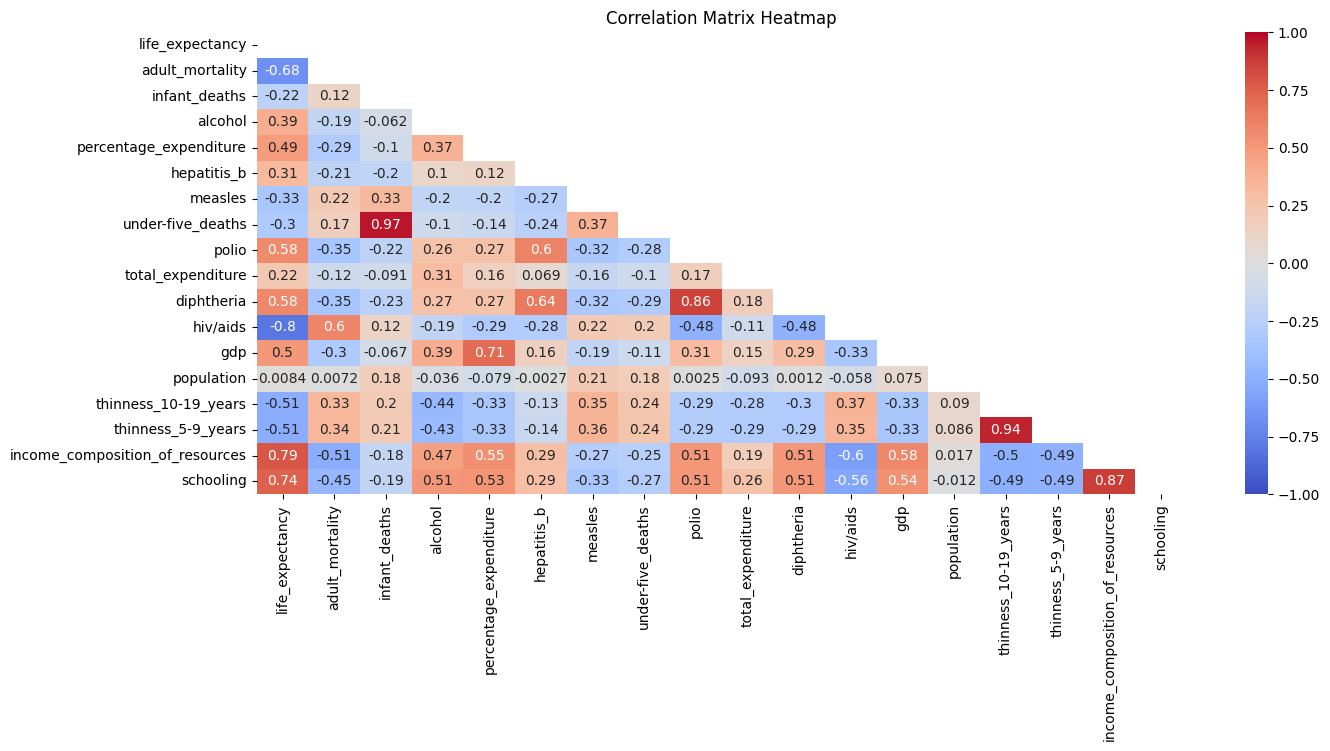

In [112]:
mask = np.triu(wins_df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(wins_df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Приведенная выше карта очень полезна! Онаотображает ряд важных взаимосвязей между переменными. Некоторые общие выводы из приведенного выше графика:
- Ожидаемая продолжительность жизни (целевая переменная), по-видимому, относительно сильно коррелирует (отрицательно или положительно) с:
    - Смертностью взрослого населения (отрицательно).
    - ВИЧ/СПИД (отрицательно)
    - Структура доходов и ресурсов (положительно)
    - Школьное образование (положительно)
- Ожидаемая продолжительность жизни (целевая переменная) крайне слабо коррелирует с численностью населения (практически не коррелирует вообще)
- Младенческая смертность и смертность в возрасте до пяти лет чрезвычайно сильно коррелируют
- Процентные расходы и ВВП относительно сильно коррелируют
- Уровень вакцинации против гепатита В относительно положительно коррелирует с уровнем вакцинации против полиомиелита и дифтерии
- Уровень вакцинации против полиомиелита и уровень вакцинации против дифтерии очень положительно коррелируют
- Уровень ВИЧ/СПИДА относительно отрицательно коррелирует со структурой доходов и ресурсов
- Показатели худобы среди детей в возрасте 5-9 лет и 10-15 лет чрезвычайно сильно коррелируют
- Структура доходов, ресурсов и школьного образования очень сильно коррелируют

#### 2.2.2: Сравнение параметров с ожидаемой продолжительностью жизни

Во-первых, может оказаться полезным посмотреть на то, как менялась ожидаемая продолжительность жизни с годами.

Посмотрим как меняется продолжительность жизни с годавми:

In [113]:
wins_df.year.corr(wins_df.life_expectancy)

0.1588505731001942

Корреляция определенно прослеживается, но достаточно ли значительны различия между годами, чтобы их можно было считать разными? Для выяснения этого будет использовано сравнение по t-критерию.

In [114]:
years = list(wins_df.year.unique())
years.sort()

In [115]:
yearly_le = {}
for year in years:
    year_data = wins_df[wins_df.year == year].life_expectancy
    yearly_le[year] = year_data

In [116]:
for year in years[:-1]:
    print(10*'-' + str(year) + ' to ' + str(year+1) + 10*'-')
    print(stats.ttest_ind(yearly_le[year], yearly_le[year+1], equal_var=False))

----------2000 to 2001----------
TtestResult(statistic=-0.25354378838005237, pvalue=0.8000008443733216, df=340.95272388288123)
----------2001 to 2002----------
TtestResult(statistic=-0.4592666882712725, pvalue=0.646333766176586, df=342.79047198877794)
----------2002 to 2003----------
TtestResult(statistic=0.3495928342596784, pvalue=0.7268619103964289, df=338.1441108432454)
----------2003 to 2004----------
TtestResult(statistic=-0.5978849078742403, pvalue=0.5503164721022256, df=338.5368732514615)
----------2004 to 2005----------
TtestResult(statistic=-0.3899507881743752, pvalue=0.6968128953533159, df=345.9650493251509)
----------2005 to 2006----------
TtestResult(statistic=-0.1303533362888356, pvalue=0.8963634013416166, df=342.5371914467886)
----------2006 to 2007----------
TtestResult(statistic=-0.09486169435789742, pvalue=0.9244818771512597, df=332.19175526644244)
----------2007 to 2008----------
TtestResult(statistic=-0.30438790362193846, pvalue=0.761027326267037, df=324.773342151720

Исходя из приведенных выше t-тестов, различия между ожидаемой продолжительностью жизни из года в год кажутся незначительными.

Как насчет статуса-страны? Определенно, существует разница в количестве значений между этими двумя переменными (обнаруженная в предыдущем одномерном анализе), но как насчет разницы между ними в отношении ожидаемой продолжительности жизни?

In [117]:
wins_df.groupby('status').life_expectancy.agg(['mean'])

,mean
status,
Developed,79.183948
Developing,67.106807


Похоже, что в "развитых" странах средняя продолжительность жизни намного выше. Но, как и в приведенных выше сравнениях по годам, существенна ли эта разница? Для выяснения этого снова будет использоваться t-критерий.

In [118]:
developed_le = wins_df[wins_df.status == 'Developed'].life_expectancy
developing_le = wins_df[wins_df.status == 'Developing'].life_expectancy
stats.ttest_ind(developed_le, developing_le, equal_var=False)

TtestResult(statistic=46.22716083171044, pvalue=2.77167264144729e-296, df=1587.7491623134024)

Исходя из результатов приведенного выше t-критерия, представляется, что между "развивающимися" и "развитыми" странами существует очень значительная разница в ожидаемой продолжительности жизни. Поскольку это так, прежде чем переходить к этапу разработки функционала, следует провести сравнение между переменной состояния и всеми другими непрерывными переменными.

#### 2.2.3: Переменная состояния по сравнению с другими непрерывными переменными

Поскольку переменная состояния содержит только два разных значения, вероятно, лучше всего сравнить ряд описательных статистических данных для этих двух значений по отношению ко всем остальным непрерывным переменным.

In [119]:
wins_df_cols = list(wins_df.columns)
interested_vars = [wins_df_cols[2]]
for col in wins_df_cols[4:]:
    interested_vars.append(col)

In [120]:
wins_df[interested_vars].groupby('status').agg('mean')

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
status,,,,,,,,,,,,,,,,,
Developed,96.027883,28.072469,9.638044,613.350892,86.558690,129.175705,35.006038,94.145336,7.436963,94.114967,0.100000,10045.692719,6.362621e+06,1.311714,1.282863,0.82997,15.461008
Developing,185.219568,28.872866,3.573921,205.643238,82.969745,247.693967,39.669759,83.587796,5.685244,83.608176,0.643813,3899.620444,7.667030e+06,5.463966,5.491026,0.59829,11.313827


Из этого следует, что многие из этих значений, вероятно, коррелируют с тем, является ли страна "развитой" или "развивающейся". И снова, t-тесты:

In [121]:
developed_df = wins_df[wins_df.status == 'Developed']
developing_df = wins_df[wins_df.status == 'Developing']
for col in interested_vars[1:]:
    print(5*'-' + str(col) + ' Developed/Developing t-test comparison' + 5*'-')
    print('p-value=' +str(stats.ttest_ind(developed_df[col], developing_df[col], equal_var=False)[1]))

-----adult_mortality Developed/Developing t-test comparison-----
p-value=3.4005394622273155e-138
-----infant_deaths Developed/Developing t-test comparison-----
p-value=0.4567728491311782
-----alcohol Developed/Developing t-test comparison-----
p-value=8.266521257733889e-193
-----percentage_expenditure Developed/Developing t-test comparison-----
p-value=5.124895718167316e-60
-----hepatitis_b Developed/Developing t-test comparison-----
p-value=1.3818887057345908e-09
-----measles Developed/Developing t-test comparison-----
p-value=2.6417196513082048e-17
-----under-five_deaths Developed/Developing t-test comparison-----
p-value=0.002366729939759637
-----polio Developed/Developing t-test comparison-----
p-value=3.3537752896218505e-102
-----total_expenditure Developed/Developing t-test comparison-----
p-value=2.583792913766737e-36
-----diphtheria Developed/Developing t-test comparison-----
p-value=1.8079068598902497e-92
-----hiv/aids Developed/Developing t-test comparison-----
p-value=1.9451

Из вышесказанного ясно видно, что существует значительная разница между следующими переменными в зависимости от статуса страны:
- Смертность взрослого населения
- Алкоголь
- Процент расходов
- Гепатит В
- Корь
- Случаи смерти в возрасте до пяти лет
- полиомиелит
- Общие расходы
- Дифтерия
- ВИЧ/СПИД
- ВВП
- Численность населения
- Худоба детей в возрасте от 10 до 19 лет
- Худоба детей в возрасте от 5 до 9 лет
- Структура доходов и ресурсов
- Школьное образование

Это означает, что статус страны, скорее всего, сильно коррелирует с вышеперечисленными переменными - как уже говорилось ранее, он также оказывает существенное влияние на разницу в ожидаемой продолжительности жизни. Эту переменную, вероятно, следует включить в наши характеристики в следующем разделе.

И теперь, когда основные сравнения были проведены между всеми значимыми переменными, пришло время перейти к этапу разработки функциональных возможностей EDA.

# Section 3: Feature Engineering

Во-первых, поскольку очевидно, что статус страны должен быть каким-то образом включен в окончательные характеристики данных, будет проведено однократное горячее кодирование, чтобы включить его в будущую модель.

In [122]:
feat_df = wins_df.join(pd.get_dummies(wins_df.status)).drop(columns='status').copy()

In [123]:
feat_df.iloc[:, 2:].corr().iloc[:, -2:].T

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,Developed,Developing
Developed,0.478819,-0.310108,-0.011604,0.584047,0.4106,0.096916,-0.130578,-0.045902,0.258129,0.284367,0.258347,-0.285391,0.433314,-0.056763,-0.394301,-0.395573,0.502343,0.502403,1.0,-1.0
Developing,-0.478819,0.310108,0.011604,-0.584047,-0.4106,-0.096916,0.130578,0.045902,-0.258129,-0.284367,-0.258347,0.285391,-0.433314,0.056763,0.394301,0.395573,-0.502343,-0.502403,-1.0,1.0


Из вышеизложенного можно сделать вывод, что то, является ли страна "развитой" или нет, безусловно, коррелирует с рядом переменных, но не очень сильно. Однако это имеет очень низкую корреляцию с младенческой смертностью, смертностью в возрасте до пяти лет и численностью населения.

Далее будут удалены столбцы категорий "год" и "страна", поскольку они не имеют существенных различий в ожидаемой продолжительности жизни.

In [124]:
feat_df.drop(columns=['country', 'year'], inplace=True)

Из предыдущего анализа следует, что существует ряд переменных, которые очень или чрезвычайно сильно коррелируют друг с другом. В этих случаях переменная, которая наиболее сильно коррелирует с ожидаемой продолжительностью жизни (целевая переменная), будет сохранена, в то время как остальные будут исключены.

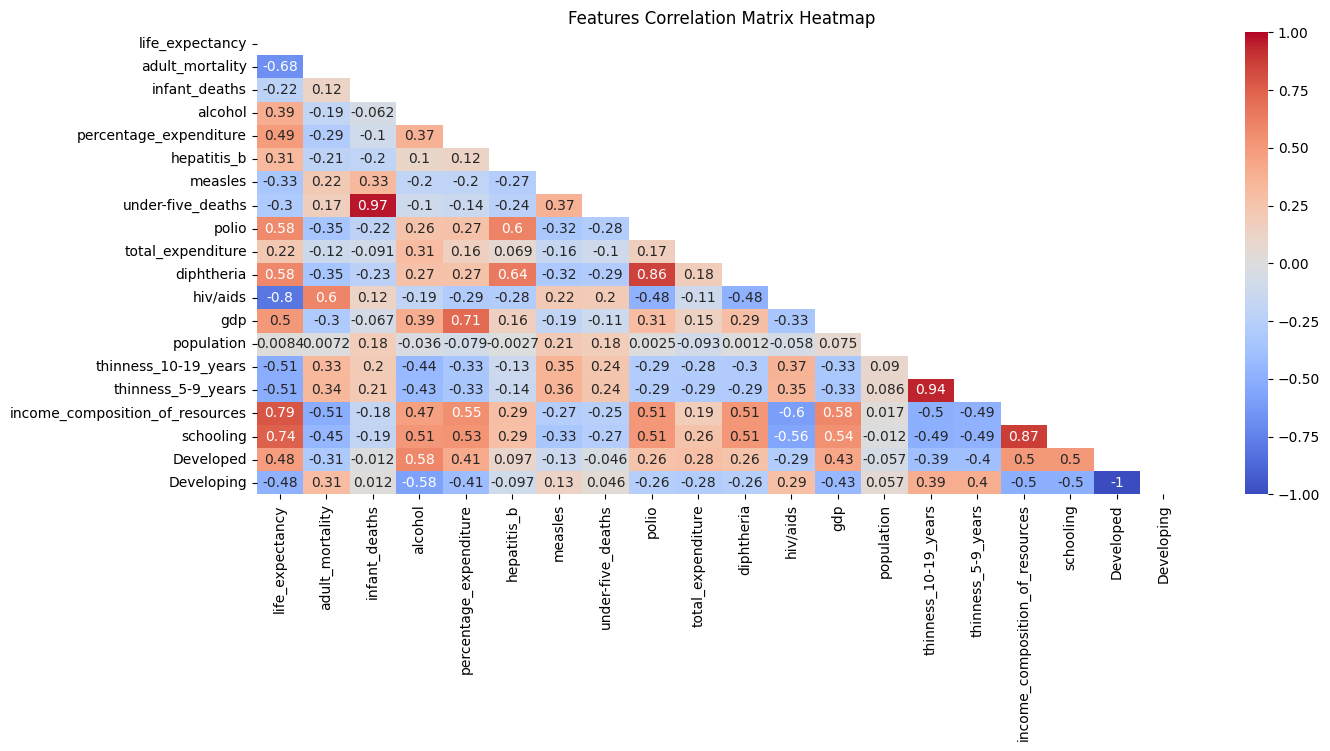

In [125]:
def feat_heatmap():
    mask = np.triu(feat_df.corr())
    plt.figure(figsize=(15,6))
    sns.heatmap(feat_df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(len(feat_df.columns), 0)
    plt.title('Features Correlation Matrix Heatmap')
    plt.show()
feat_heatmap()

Следующие показатели очень сильно коррелируют (корреляция > .7 или корреляция < -.7):
- Младенческая смертность/случаи смерти в возрасте до пяти лет (снижение младенческой смертности - случаи смерти в возрасте до пяти лет более тесно связаны с ожидаемой продолжительностью жизни)
- ВВП/процентные расходы (снижение процентных расходов - ВВП в большей степени коррелирует с ожидаемой продолжительностью жизни)
- Полиомиелит/дифтерия (снижение заболеваемости полиомиелитом - дифтерия в большей степени коррелирует с ожидаемой продолжительностью жизни)
- Худоба 5-9/Худоба 10-19 (уменьшите худобу на 10-19, так как корреляции с другими переменными немного выше)
- Соотношение доходов к ресурсам/образованию (отказаться от обучения - соотношение доходов к ресурсам в большей степени коррелирует с ожидаемой продолжительностью жизни)
- Развитие/Развитый (отказаться от развития - эти два понятия одинаковы, только противоположны друг другу)

In [126]:
feat_df.drop(columns=['infant_deaths', 'percentage_expenditure','polio','thinness_10-19_years','schooling','Developing'], inplace=True)

В дополнение к вышеперечисленным переменным также может оказаться полезным исключить переменные, которые не очень сильно коррелируют ни с одной из других переменных, единственной переменной, где это имеет место, является "Население".

In [127]:
feat_df.drop(columns=['population'], inplace=True)

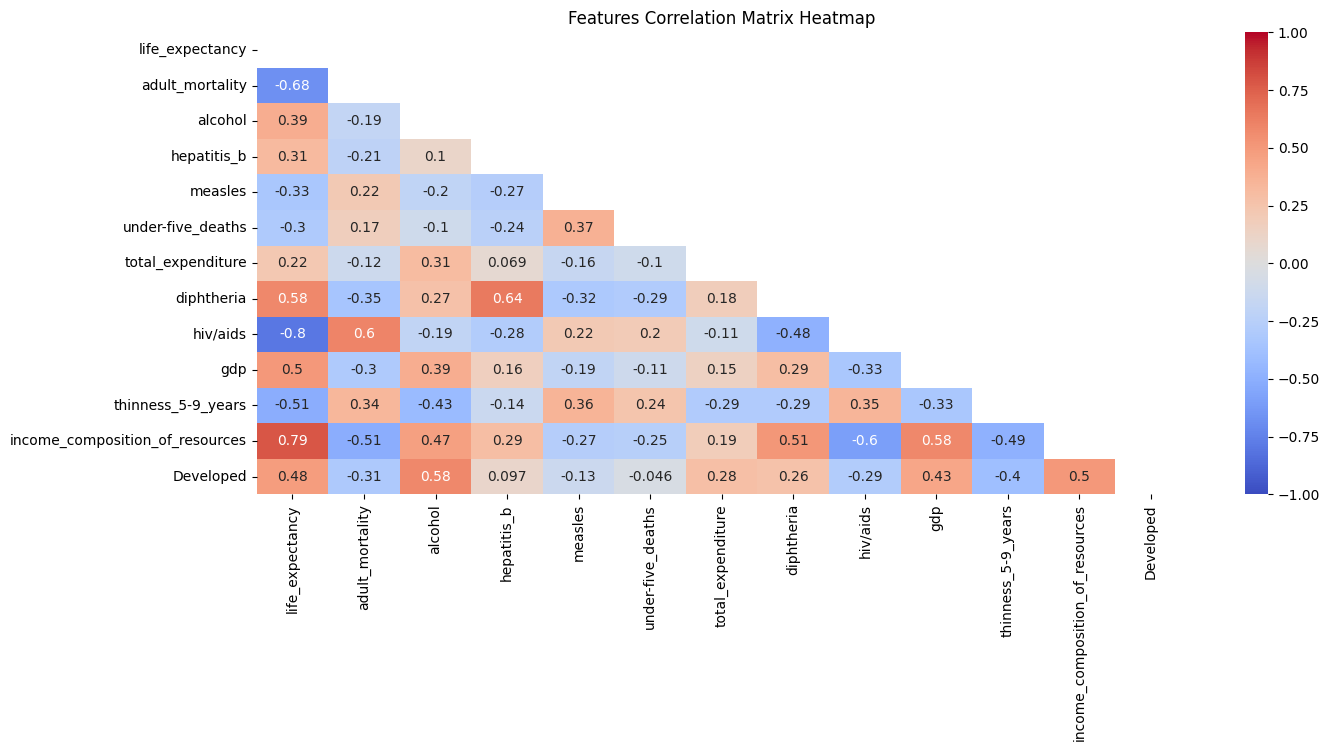

In [128]:
feat_heatmap()

В конечном счете, я бы, вероятно, начал моделирование с использования функций, предшествующих методу PCA. Эти функции следующие:
1. Смертность взрослого населения
2. Алкоголь
3. Гепатит В
4. Корь
5. Смертность детей в возрасте до пяти лет
6. Общие расходы
7. Дифтерия
8. ВИЧ/СПИД
9. ВВП
10. Продолжительность Жизни 5-9 Лет
11. Структура Доходов И Ресурсов
12. Развитые Страны

Все вышеперечисленные переменные, на первый взгляд, имеют значимую корреляцию с целевой переменной (ожидаемой продолжительностью жизни), но в то же время не слишком сильно коррелируют друг с другом.

Причина, по которой не было удалено больше переменных, заключается в том, что, по-видимому, нет веской причины для дальнейшего удаления. В конечном счете, сохранение большего количества показателей, вероятно, лучше, если они достаточно отличаются друг от друга (и их не слишком много).

# Section 4: Итоги

Таким образом, набор данных начинался с 21 нечеткой переменной (включая целевую) и был сокращен до 12 признаков для описания целевой переменной (ожидаемой продолжительности жизни). Скорее всего, это только начало того, что можно было бы сделать с помощью этого набора данных, но, тем не менее, он служит прочной основой для моделирования. Ниже приводится общий обзор того, что было сделано в рамках этого проекта.

Первым шагом была очистка данных, которая включала в себя обнаружение и обработку как пропущенных значений, так и выбросов. Переменным и набору данных было дано общее описание, чтобы можно было лучше понять, что означают переменные. Затем были обнаружены как явные, так и неявные пропущенные значения. Необъяснимо пропущенные значения - это значения, которые не имеют смысла для переменной, учитывая характер данных. Было найдено несколько значений, которые казались бессмысленными, учитывая описания многих переменных. Эти необъяснимые пропущенные значения были затем преобразованы в явно пропущенные значения или нулевые значения. Интерполяция, вероятно, была бы лучшим методом обработки явно пропущенных значений (поскольку это данные временных рядов), но интерполяция в этом случае не дала бы никаких результатов. Поэтому вместо этого было принято следующее оптимальное решение - вычисление на основе средних значений для всех стран по годам. После того, как пропущенные значения были отсортированы, следующим шагом было выявление и устранение отклонений. Определение экстремальных значений осуществлялось в основном с помощью стандартных прямоугольных графиков. Используя этот метод, данные по каждой переменной были систематизированы по отдельности, чтобы исключить выбросы и при этом ограничить потерю данных. После завершения этого этапа можно было приступить к анализу данных.

Затем обработанный набор данных был проанализирован с использованием одномерных и двумерных методов. Один из методов, использованных для одномерного анализа, заключался в проверке непрерывных переменных с использованием гистограмм, чтобы получить представление об их распределении. Общая описательная статистика также была получена для непрерывных переменных. После этого были созданы графики категориального подсчета, чтобы получить представление о "распределении" категориальных данных. В результате этого анализа было обнаружено, что большинство данных относится к статусу "Развивающейся" страны. Когда одномерный анализ был завершен, пришло время перейти к двумерному анализу. Двумерный анализ, безусловно, заложил основу для понимания взаимосвязей не только между целевой переменной (ожидаемой продолжительностью жизни) и другими переменными, но и для сравнения каждой переменной между собой. Основным методом, использованным при двумерном анализе, было использование корреляционной матрицы в сочетании с визуальной тепловой картой из библиотеки Seaborn. Это позволило провести основные сравнения между непрерывными данными и послужило основой для выбора признаков. Но прежде чем перейти к разработке функций, некоторые категориальные переменные были сопоставлены с целевой переменной. Было обнаружено, что "Ожидаемая продолжительность жизни" в пересчете на год не имеет достаточно существенной разницы для использования в анализе. Однако было обнаружено, что "Статус" страны оказывает значительное влияние на "ожидаемую продолжительность жизни". В дополнение к "ожидаемой продолжительности жизни", она также значительно отличается по ряду других непрерывных переменных. Именно по этой причине в следующем разделе "разработка функций" были созданы новые индикаторные переменные "Разработано" и "Развивается".

Наконец, разработка функций. Во-первых, были удалены категориальные переменные "Год" и "Страна", поскольку они не обеспечивали существенных различий между данными. Затем, имея общее представление о переменных и их взаимосвязи друг с другом, было относительно просто удалить ряд переменных, "сильно коррелирующих друг с другом". Основной метод состоял в использовании тепловой карты корреляционной матрицы для выявления переменных, которые сильно коррелировали с другими, а затем из этих пар сохраняли переменную, которая была более сильно коррелирована с целью. С помощью этого метода количество переменных было сокращено с 20 до 12 объектов. Вероятно, потребуется дальнейшая трансформация характеристик, но без знания того, какая модель будет использоваться, этот набор базовых характеристик представляется наилучшим и наиболее репрезентативным набором для целевой переменной "Ожидаемая продолжительность жизни". С учетом сказанного, ниже приведена окончательная тепловая карта для всех объектов, выбранных в конечном итоге выше (а также целевая переменная).

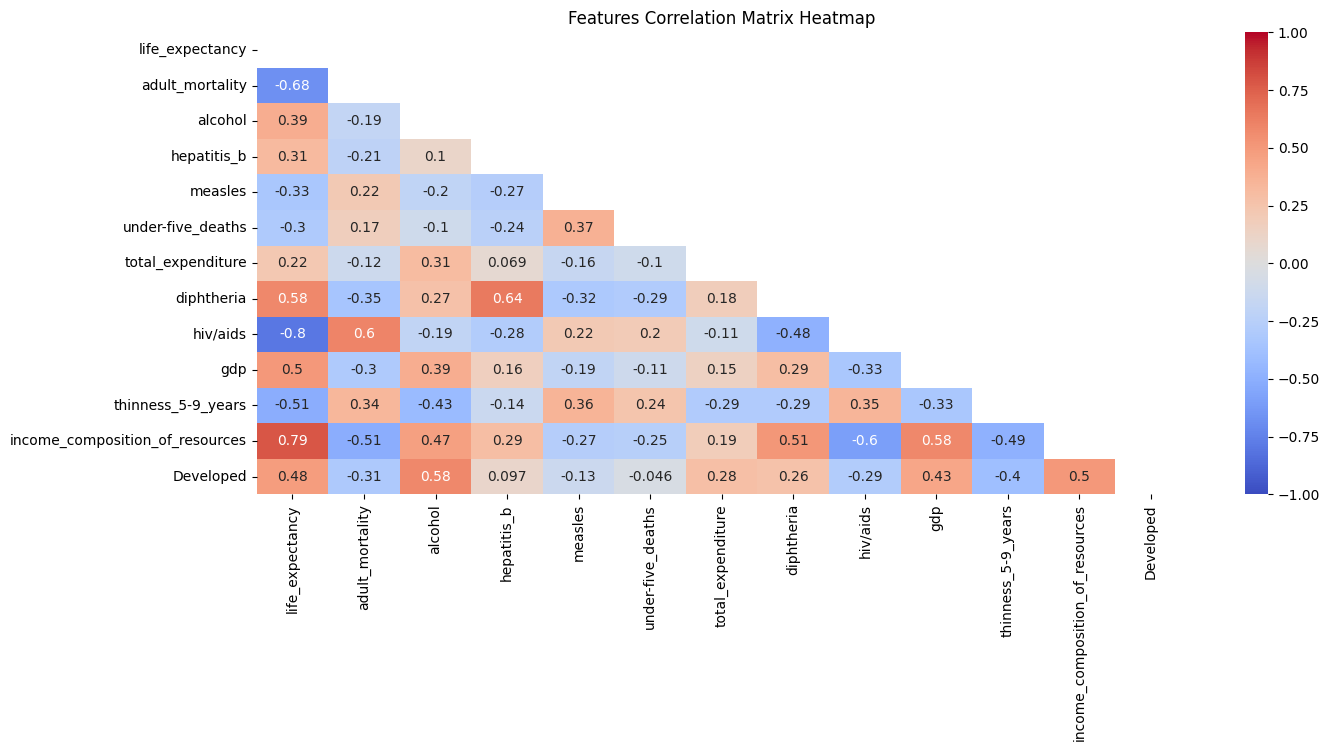

In [129]:
feat_heatmap()